# Python data analysis and engineering problems practice

## First exercise 
**Task** : Use NumPy + Pandas + Matplotlib + SciPy to clean, analyze, and visualize energy data.
1. Create a synthetic dataset for hourly power consumption (kWh) over 30 days.
- Add Gaussian noise with NumPy (np.random.normal).
- Store it in a Pandas DataFrame with a datetime index.

2. Compute:
- Daily totals and rolling 7-day average.
- Peak consumption hour each day.

3.  Fit a trend line using `scipy.optimize.curve_fit` (e.g. exponential or sinusoidal model).

4. Plot:
Original signal vs. fitted curve.
Rolling averages (Matplotlib or Seaborn).

C:\Users\PC\AppData\Local\Temp\ipykernel_3628\2354468900.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2023-01-01', end='2023-01-31 23:00', freq='H')


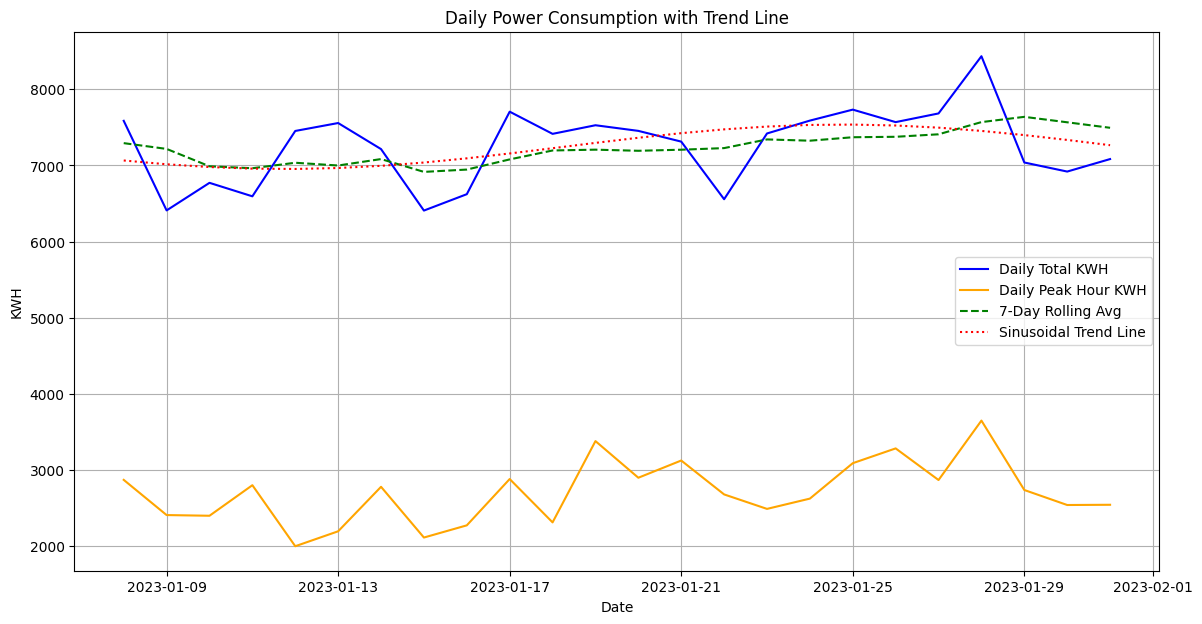

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
# Function to model exponential trend
def exponential_trend(x, a, b, c):
    return a * np.exp(b * x) + c

# function for a sinusoidal trend line (daily seasonality)
def sinusoidal_trend(x, A, omega, phi, C):
    return A * np.sin(omega * x + phi) + C



# Creating a synthetic dataset for hourly power consumption (KWH) over a month
date_rng = pd.date_range(start='2023-01-01', end='2023-01-31 23:00', freq='H')
power_consumption = np.random.randint(100, 500, size=(len(date_rng)))
data = pd.DataFrame(date_rng, columns=['timestamp'])
data['KWH'] = power_consumption
data.set_index('timestamp', inplace=True)
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['day_of_month'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
data['is_working_hour'] = data['hour'].apply(lambda x: 1 if 9 <= x <= 17 else 0)
data['lag_1'] = data['KWH'].shift(1)
data['lag_24'] = data['KWH'].shift(24)
data.dropna(inplace=True)

# Computing Daily totals and rolling 7 day average
daily_data = data.resample('D').sum()
daily_data['rolling_7d_avg'] = daily_data['KWH'].rolling(window=7).mean()
daily_data.dropna(inplace=True)

# Computing Peak Hour Consumption (9 AM to 5 PM)
peak_hours_data = data[(data['hour'] >= 9) & (data['hour'] <= 17)]
peak_hourly = peak_hours_data.resample('D').sum()
peak_hourly.rename(columns={'KWH': 'peak_KWH'}, inplace=True)
peak_hourly.dropna(inplace=True)

# Merging daily total and peak hour data
final_daily_data = daily_data.merge(peak_hourly[['peak_KWH']], left_index=True, right_index=True)

# Fitting a trend line  (sinusoidal model)
x_data = np.arange(len(final_daily_data))
y_data = final_daily_data['KWH'].values
params, covariance = curve_fit(sinusoidal_trend, x_data, y_data, 
                               p0=[100, 2 * np.pi / 30, 0, np.mean(y_data)])
final_daily_data['trendline'] = sinusoidal_trend(x_data, *params)

# Plotting Daily Total and Peak Hour Consumption and trendline

plt.figure(figsize=(14, 7))
plt.plot(final_daily_data.index, final_daily_data['KWH'], label='Daily Total KWH', color='blue')
plt.plot(final_daily_data.index, final_daily_data['peak_KWH'], label='Daily Peak Hour KWH', color='orange')
plt.plot(final_daily_data.index, final_daily_data['rolling_7d_avg'], label='7-Day Rolling Avg', color='green', linestyle='--')
plt.plot(final_daily_data.index, final_daily_data['trendline'], label='Sinusoidal Trend Line', color='red', linestyle=':')
plt.title('Daily Power Consumption with Trend Line')
plt.xlabel('Date')
plt.ylabel('KWH')
plt.legend()
plt.grid()
plt.show()



## Second exercise
